# Python-executable version of PathView Graph for ARC single BCR model

Runs ARC-class fuel cycle residence time model based on Meschini's work.
Expect simulation to take around 5 minutes to run.

In [1]:

from pathview_python_code import arc_same_as_meschini

# Execute the function to run the model and save results
arc_same_as_meschini(300 * 24 * 3600) # 300 days in seconds

11:41:40 - INFO - LOGGING (log: True)
11:41:40 - INFO - BLOCKS (total: 25, dynamic: 11, static: 14, eventful: 1)
11:41:40 - INFO - GRAPH (nodes: 25, edges: 40, alg. depth: 3, loop depth: 0, runtime: 0.783ms)
11:41:40 - INFO - STARTING -> TRANSIENT (Duration: 25920000.00s)
11:41:49 - INFO - --------------------   1% | 9.0s<14:08 | 453.2 it/s
11:42:00 - INFO - --------------------   2% | 18.5s<13:08 | 457.7 it/s
11:42:09 - INFO - --------------------   3% | 27.3s<12:06 | 458.3 it/s
11:42:17 - INFO - --------------------   4% | 35.8s<13:39 | 440.7 it/s
11:42:26 - INFO - #-------------------   5% | 44.6s<12:32 | 483.7 it/s
11:42:37 - INFO - #-------------------   6% | 53.8s<12:33 | 480.4 it/s
11:42:46 - INFO - #-------------------   7% | 01:02<20:35 | 331.6 it/s
11:42:54 - INFO - #-------------------   8% | 01:11<11:44 | 459.0 it/s
11:43:03 - INFO - #-------------------   9% | 01:19<12:24 | 454.9 it/s
11:43:13 - INFO - ##------------------  10% | 01:28<16:29 | 345.9 it/s
11:43:24 - INFO - 

Plot saved to: ../plots/ARC_same_as_meschini_inventory_vs_time_Fig1.png
Plot saved to: ../plots/ARC_same_as_meschini_inventory_vs_time_Fig1.pdf


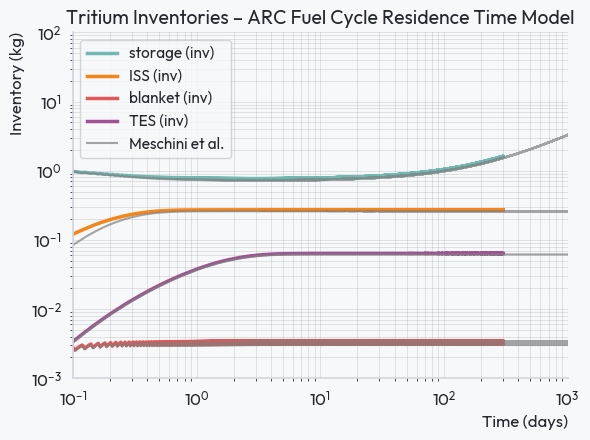

In [3]:
### Plot Results: Inventory vs Time ###

import numpy as np
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import morethemes as mt

# Load results and metadata
results_path = '../results/ARC_same_as_meschini_results.npz'
metadata_path = '../results/ARC_same_as_meschini_metadata.json'

loaded_data = np.load(results_path)
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# print(list(loaded_data.keys()))

# read data from a url for comparison
url = "https://raw.githubusercontent.com/SamueleMeschini/fuel-cycle/refs/heads/main/postprocessing/data/inventory_evolution_tbz1h.csv"
data_meschini = pd.read_csv(url)
time_meschini_days = data_meschini["time [s]"] / (24 * 3600)

# Extract time (same for all scopes)
time = loaded_data['scope_0_Storage_Pump_ISS_Cleanup_time']
time_days = time / (24 * 3600)

# Extract inner fuel cycle data (scope 0)
inner_fc_data = loaded_data['scope_0_Storage_Pump_ISS_Cleanup_data']

# Extract outer fuel cycle data (scope 1)
outer_fc_data = loaded_data['scope_1_Divertor_FW_Blanket_TES_HX_data']

# Create figure
mt.set_theme("lighter")
fig, ax = plt.subplots(figsize=(6, 4.5))

# Plot each inventory component
# Storage (index 0 from scope 0)
ax.loglog(time_days, inner_fc_data[0], linewidth=2.5, label='storage (inv)')

# ISS (index 2 from scope 0)
ax.loglog(time_days, inner_fc_data[2], linewidth=2.5, label='ISS (inv)')

# Blanket (index 2 from scope 1)
ax.loglog(time_days, outer_fc_data[2], linewidth=2.5, label='blanket (inv)')

# TES (index 3 from scope 1)
ax.loglog(time_days, outer_fc_data[3], linewidth=2.5, label='TES (inv)')

# Plot Meschini's data for comparison
ax.loglog(time_meschini_days, data_meschini["storage inventory [kg]"], color="tab:grey", alpha=0.7, label="Meschini et al.")
ax.loglog(time_meschini_days, data_meschini["ISS inventory [kg]"], color="tab:grey", alpha=0.7)
ax.loglog(time_meschini_days, data_meschini["blanket inventory [kg]"], color="tab:grey", alpha=0.7)
ax.loglog(time_meschini_days, data_meschini["TES inventory [kg]"], color="tab:grey", alpha=0.7)

# Styling
fs = 12
ax.set_xlabel('Time (days)', fontsize=fs)
ax.set_ylabel('Inventory (kg)', fontsize=fs)
ax.set_title('Tritium Inventories – ARC Fuel Cycle Residence Time Model', fontsize = fs+2, fontweight = 'bold')
ax.set_xlim([0.1, 1e3])
ax.set_ylim([1e-3, 1e2])
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.grid(True, which='both', alpha=0.3)
ax.legend(loc='best', fontsize=11)

plt.tight_layout()

# Save plot to plots folder
plots_dir = '../plots'
os.makedirs(plots_dir, exist_ok=True)
plot_filename = 'ARC_same_as_meschini_inventory_vs_time_Fig1.png'
plot_path = os.path.join(plots_dir, plot_filename)
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {plot_path}")

# Save as PDF
pdf_filename = 'ARC_same_as_meschini_inventory_vs_time_Fig1.pdf'
pdf_path = os.path.join(plots_dir, pdf_filename)
plt.savefig(pdf_path, bbox_inches='tight')
print(f"Plot saved to: {pdf_path}")

plt.show()